In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150

In [3]:
import glob
import fitsio
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as pl
from sklearn.decomposition import FastICA, RandomizedPCA, NMF, ProjectedGradientNMF

In [6]:
bkg = fitsio.read("data/tess/05h28m00s+01d00m00s_dfm_expected/1800s/sub200x200/backgrounds.fits")

In [7]:
flat = 1 + 0.01 * np.random.randn(*(bkg.shape))

In [12]:
vrng = None
# pl.figure(figsize=(8, 8))
block = []
# fns = glob.glob("space.mit.edu/outgoing/zkbt/05h28m00s+01d00m00s_dfm_expected/1800s/sub200x200/simulated_*.fits")
fns = glob.glob("data/tess/05h28m00s+01d00m00s_dfm_extreme/1800s/sub200x200/simulated_*.fits")
for i, fn in tqdm(enumerate(fns), total=len(fns)):
    data = fitsio.read(fn)
    counts = data * flat
    block.append(counts)
#     counts = counts[50:150, 50:150]
#     if vrng is None:
#         vrng = np.log((counts.min(), counts.max()))
#     pl.clf()
#     pl.imshow(np.log(counts), cmap="gray_r", interpolation="nearest", vmin=vrng[0], vmax=vrng[1])
#     pl.axis("off");
#     pl.savefig("images/{0:04d}.png".format(i))

block = np.array(block)

In [13]:
block.shape

(1320, 200, 200)

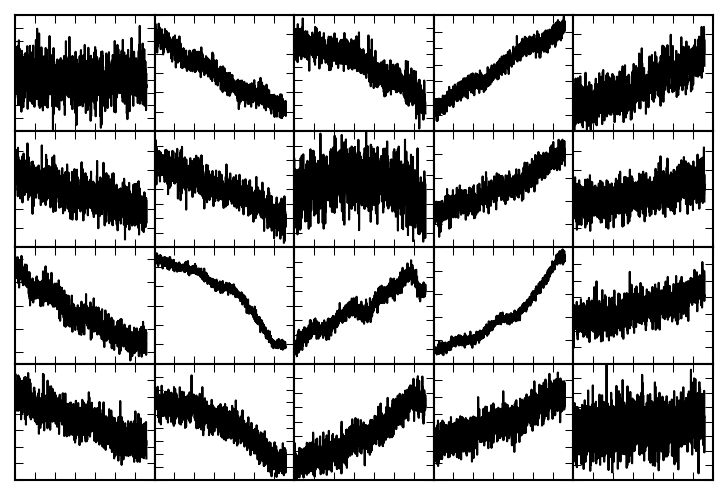

In [14]:
X = block[:, 3:7, 2:7]
fig, axes = pl.subplots(X.shape[1], X.shape[2], sharex=True)
for i, j in product(range(X.shape[1]), range(X.shape[2])):
    ax = axes[i, j]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.plot(X[:, i, j], "k")
fig.subplots_adjust(hspace=0, wspace=0)

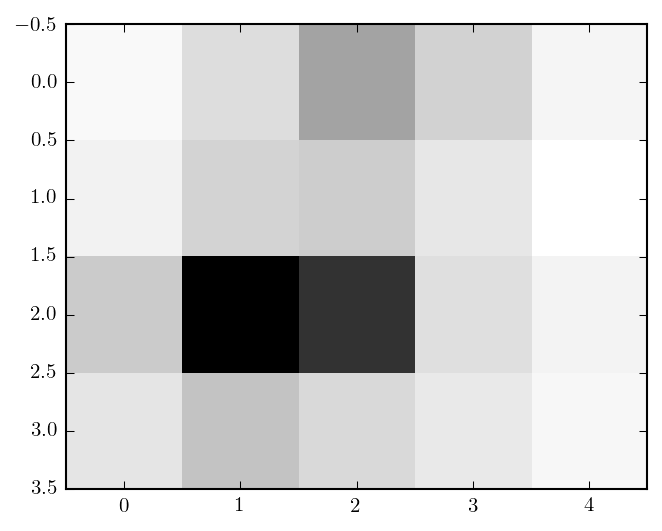

In [15]:
pl.imshow(X[0], cmap="gray_r", interpolation="nearest");

In [16]:
block0 = block[:, 50:150, 50:150]
block0 = block0.reshape((len(block0), -1))
# block0[40:55, 10] *= 1.0 - 0.1**2
# block0 -= np.mean(block0, axis=0)
# block0 /= np.std(block0, axis=0)

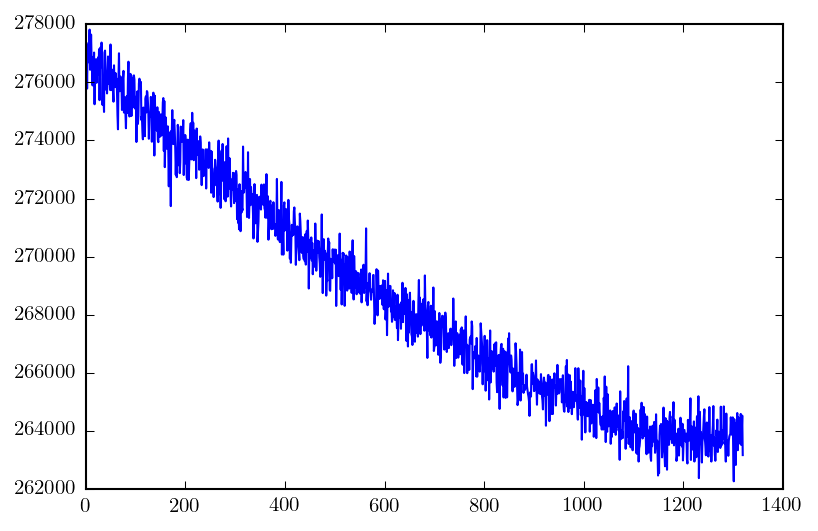

In [17]:
pl.plot(block0[:, 5])

In [18]:
model = FastICA(n_components=100)
model.fit(block0.T)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=100, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [19]:
n = len(model.components_)
print(n)

100


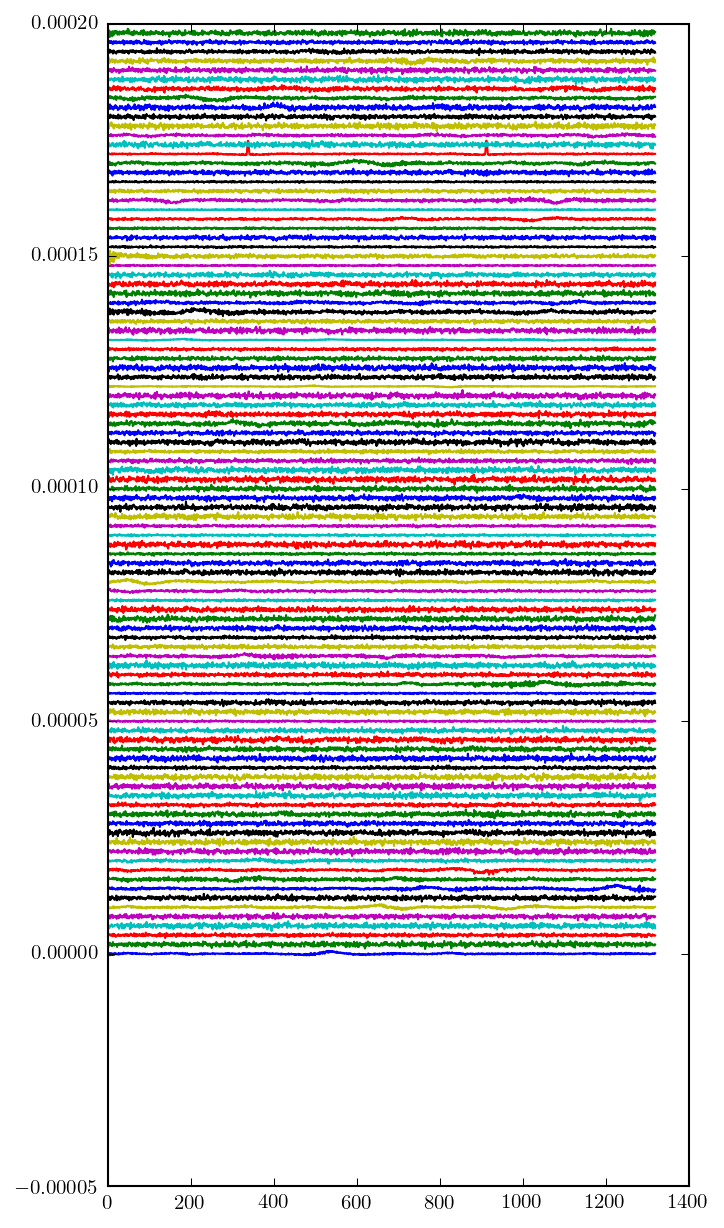

In [20]:
pl.figure(figsize=(5, 10))
pl.plot(model.components_.T + 2e-6*np.arange(n));

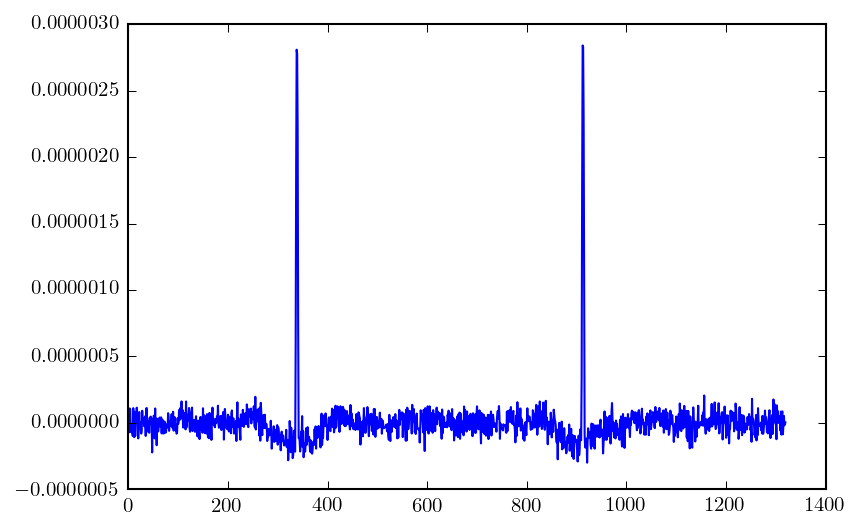

In [28]:
v = model.components_[-14]
pl.plot(v);

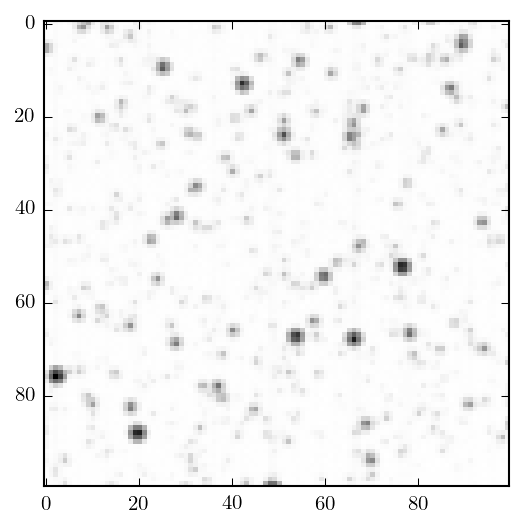

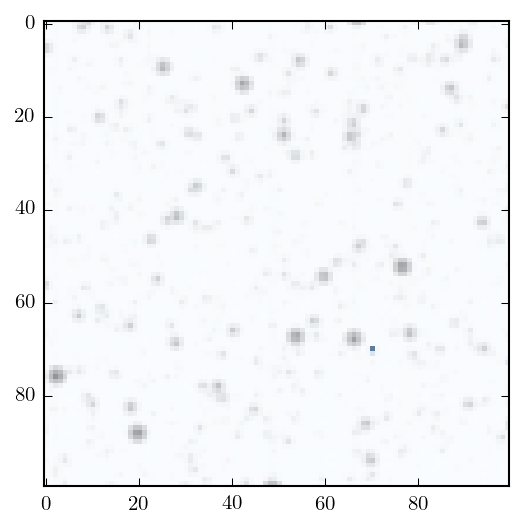

In [31]:
pl.figure(figsize=(4, 4))
pl.imshow(np.log(block0[0].reshape((100, 100))), cmap="gray_r", interpolation="nearest")
pl.figure(figsize=(4, 4))
pl.imshow(np.log(block0[0].reshape((100, 100))), cmap="gray_r", interpolation="nearest")
pl.imshow((np.dot(v, block0)**2).reshape((100, 100)), cmap="Blues", interpolation="nearest", alpha=0.6)